In [17]:
import numpy as np
import math

In [18]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [19]:
np.random.seed(0)
X=np.vstack([np.random.rand(20,2)-[2,2],np.random.randn(20,2)+[2,2]])
y=np.hstack([np.zeros(20),np.ones(20)])

In [20]:
X=np.hstack((np.ones((X.shape[0],1)),X))

In [26]:
def sigmoid(z):
  return 1/(1+np.exp(-z))


In [27]:
def logistic_regression(X,y,lr,num_iterations,lamda_reg):
  N,D=X.shape
  w=np.zeros(D)
  for _ in range(num_iterations):
    #h=wT.x
    #u=sigmoid(h)
    h=sigmoid(np.dot(X,w))
    #L(w)=L1(w) + lamda.wT.w
    gradient=(np.dot(X.T,(h-y)))*1/N+lamda_reg*w
    w=w-lr*gradient
  return w

In [28]:
lr=0.01
num_iterations=50
lamda_reg=0.5

w=logistic_regression(X,y,lr,num_iterations,lamda_reg)


In [29]:
#Create a colormap for visualization
colors=[(1,0,0),(1,1,1),(0,0,1)]
n_bins=100
cmap_name="custom_colormap"
cm=LinearSegmentedColormap.from_list(cmap_name,colors,N=n_bins)


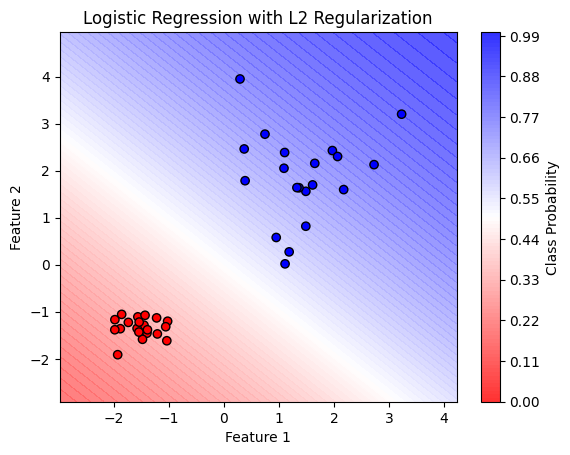

In [30]:
x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = sigmoid(np.dot(np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()], w))
Z = Z.reshape(xx.shape)

# Create contour plot with custom colormap
contour = plt.contourf(xx, yy, Z, cmap=cm, alpha=0.8, levels=np.linspace(0, 1, 101))

# Also plot the data points
plt.scatter(X[:, 1], X[:, 2], c=y, cmap=cm, edgecolors='k', linewidths=1)

# Add colorbar
cbar = plt.colorbar(contour)
cbar.set_label('Class Probability')

# Add labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression with L2 Regularization')

plt.show()